# Create Subset of Data containing only messages from January 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Version 1 - Groups and Channels Separated

In [55]:
# load full data - group messages
groups = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_70657/879611167.py:2: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,21,26,27,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  groups = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')


In [56]:
# load full data - channel messages
channels = pd.read_csv('../data/channel_subsample.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_70657/936239714.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,25,30,31,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  channels = pd.read_csv('../data/channel_subsample.csv.gzip', compression='gzip')


In [57]:
# add group/channel column
groups['group_or_channel'] = 'group'
channels['group_or_channel'] = 'channel'

In [58]:
# reformat date columns
groups['date'] = pd.to_datetime(groups['posting_date']).dt.date
channels['date'] = pd.to_datetime(channels['posting_date']).dt.date

In [59]:
# filter down to only contain dates form January 2021
groups = groups[(groups['date'] >= pd.to_datetime('2021-01-01').date()) & (groups['date'] <= pd.to_datetime('2021-01-31').date())]
channels = channels[(channels['date'] >= pd.to_datetime('2021-01-01').date()) & (channels['date'] <= pd.to_datetime('2021-01-31').date())]

In [60]:
# sort both by date
groups = groups.sort_values(by ='date', ascending=True)
channels = channels.sort_values(by ='date', ascending=True)

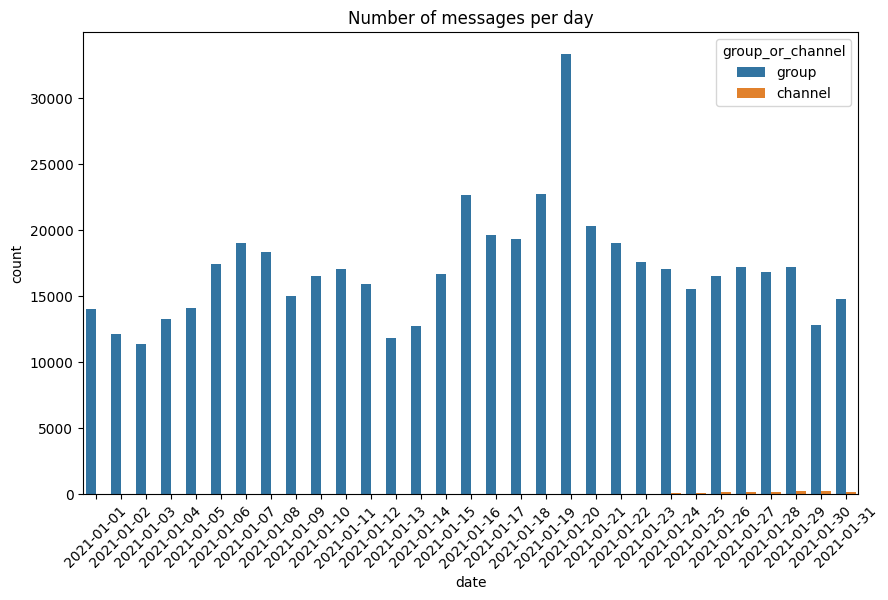

In [61]:
# plot number of messages per day
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=pd.concat([groups, channels]), x='date', hue='group_or_channel', ax=ax)
plt.xticks(rotation=45)
plt.title('Number of messages per day')
plt.show()

In [62]:
print(f'{len(groups)} group messages in January 2021')
print(f'{len(channels)} channel messages in January 2021')
print(f'{len(groups) + len(channels)} total messages in January 2021')

527643 group messages in January 2021
1250 channel messages in January 2021
528893 total messages in January 2021


In [63]:
# concat both
all_messages = pd.concat([groups, channels])

In [64]:
# display all columns
pd.set_option('display.max_columns', None)

In [65]:
all_messages.head()

,Unnamed: 0.1,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score,group_or_channel,date,fwd_urls,urls,newsguard_scores,fwd_regex,fwd_cryptocurrency,fwd_cryptolabel,regex,cryptocurrency,cryptolabel
2806662,2806662,2987516,191942-2216795262304420685,2806367.0,191942.0,191942.0,Alles Ausser Mainstream Chat,2021-01-01 02:44:47+00:00,Aluhut,NaN,NaN,2021-01-01 02:44:47+00:00,#go_to_message191940,NaN,NaN,NaN,NaN,NaN,NaN,1.623532e+18,NaN,2021-01-01 12:00:00+00:00,53.0,5.0,7.145303e+18,NaN,NaN,191940-2216795262304420685,2021.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5658100,1580379,20973156,3420028197782804714237638,NaN,NaN,NaN,1Research7Intelligence Room,2021-01-01 10:42:17+00:00,NaN,NaN,NaN,2021-01-01 10:42:17+00:00,#go_to_message341999,NaN,NaN,NaN,NaN,NaN,NaN,4.462220e+17,NaN,NaN,NaN,NaN,-1.014670e+18,NaN,NaN,3419998197782804714237638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5658099,1580378,20973155,3420018197782804714237638,NaN,NaN,NaN,1Research7Intelligence Room,2021-01-01 10:42:05+00:00,NaN,NaN,NaN,2021-01-01 10:42:05+00:00,#go_to_message341999,NaN,NaN,NaN,NaN,NaN,NaN,3.585459e+18,NaN,NaN,NaN,NaN,1.008511e+18,NaN,NaN,3419998197782804714237638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5658098,1580377,20973154,3420008197782804714237638,NaN,NaN,NaN,1Research7Intelligence Room,2021-01-01 10:41:35+00:00,NaN,NaN,NaN,2021-01-01 10:41:35+00:00,#go_to_message341536,NaN,NaN,NaN,NaN,NaN,NaN,7.710454e+18,NaN,NaN,NaN,NaN,3.405186e+17,NaN,NaN,3415368197782804714237638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5658097,1580376,20973153,3419998197782804714237638,NaN,NaN,NaN,1Research7Intelligence Room,2021-01-01 10:39:42+00:00,NaN,NaN,NaN,2021-01-01 10:39:42+00:00,#go_to_message341996,NaN,NaN,NaN,NaN,NaN,NaN,8.208199e+18,NaN,NaN,NaN,NaN,-3.596714e+18,NaN,NaN,3419968197782804714237638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# only keep relevant columns
all_messages = all_messages[['UID_key','author', 'message','fwd_message', 'date', 'transcribed_message', 'group_or_channel', 'group_name', 'fwd_author']]

In [67]:
all_messages.head()

,UID_key,author,mid_message,message,fwd_message,date,transcribed_message,group_or_channel,group_name,fwd_author
2806662,191942-2216795262304420685,1.623532e+18,191942.0,Aluhut,NaN,2021-01-01,NaN,group,Alles Ausser Mainstream Chat,NaN
5658100,3420028197782804714237638,4.462220e+17,NaN,NaN,NaN,2021-01-01,NaN,group,1Research7Intelligence Room,NaN
5658099,3420018197782804714237638,3.585459e+18,NaN,NaN,NaN,2021-01-01,NaN,group,1Research7Intelligence Room,NaN
5658098,3420008197782804714237638,7.710454e+18,NaN,NaN,NaN,2021-01-01,NaN,group,1Research7Intelligence Room,NaN
5658097,3419998197782804714237638,8.208199e+18,NaN,NaN,NaN,2021-01-01,NaN,group,1Research7Intelligence Room,NaN


In [69]:
all_messages.to_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')

In [70]:
# make sure that only one version runs
exit()

# Version 2 - All in one dataset

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
all_messages = pd.read_csv('../data/unhashed_topic_subsample.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_77971/3489735210.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  all_messages = pd.read_csv('../data/unhashed_topic_subsample.csv.gzip', compression='gzip')


In [4]:
all_messages.head()

,Unnamed: 0,uid,mid_message,posting_date,message,fwd_message,fwd_posting_date_message,mid_file,posting_date_file,link_url,media_file,media_file_type,fwd_link_url,fwd_media_file,fwd_media_file_type,fwd_posting_date_file,group_name,posting_date_author,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,message_id,replied_to
0,0,60512676786044655871851,6051.0,2020-05-21 20:24:26+00:00,Obama George und ein kleines asiatisches Mädch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenocrime Chat,2020-05-21 20:24:26+00:00,°,NaN,2020-05-21 12:00:00+00:00,21.0,4.0,5.393330e+18,NaN,NaN,6051.0,NaN
1,1,60522676786044655871851,6052.0,2020-05-21 20:24:41+00:00,Ist das zu hart Tergo?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenocrime Chat,2020-05-21 20:24:41+00:00,Ariane,NaN,2020-05-21 12:00:00+00:00,21.0,4.0,1.298945e+18,NaN,NaN,6052.0,NaN
2,2,60532676786044655871851,6053.0,2020-05-21 20:24:51+00:00,Es ist bekannt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenocrime Chat,2020-05-21 20:24:51+00:00,Kind der Sonne 🌟Des Licht🌟,NaN,2020-05-21 12:00:00+00:00,21.0,4.0,8.418984e+18,NaN,NaN,6053.0,NaN
3,3,60542676786044655871851,6054.0,2020-05-21 20:25:06+00:00,"Nicht Schiss, schoß. Oh man",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenocrime Chat,2020-05-21 20:25:06+00:00,Ariane,NaN,2020-05-21 12:00:00+00:00,21.0,4.0,1.036349e+18,NaN,NaN,6054.0,NaN
4,4,60552676786044655871851,6055.0,2020-05-21 20:25:08+00:00,Könnte das Mädel sein was auf seinem Schoß fot...,NaN,NaN,6055.0,2020-05-21 20:25:08+00:00,messages5.html#go_to_message6026,NaN,NaN,NaN,NaN,NaN,NaN,Adrenocrime Chat,2020-05-21 20:25:08+00:00,Deleted Account,NaN,2020-05-21 12:00:00+00:00,21.0,4.0,-8.072710e+18,NaN,NaN,6055.0,60262676786044655871851


In [5]:
# channels can be recognized by the fact that the author is the same as the group name
all_messages['group_or_channel'] = ['channel' if row['author'] == row['group_name'] else 'group' for index, row in all_messages.iterrows()]

In [6]:
# reformatting columns
all_messages['date'] = pd.to_datetime(all_messages['posting_date']).dt.date
all_messages.rename(columns={'uid': 'UID_key'}, inplace=True)
# currently no transcribed messages in sample; to make sure that the code works, we will add an empty transcribed message
all_messages['transcribed_message'] = ''

In [7]:
# only keep relevant columns
all_messages = all_messages[['UID_key','author', 'message','fwd_message', 'date', 'transcribed_message', 'group_or_channel', 'group_name', 'fwd_author']]

In [8]:
# filter down to only contain dates form January 2021
all_messages = all_messages[(all_messages['date'] >= pd.to_datetime('2021-01-01').date()) & (all_messages['date'] <= pd.to_datetime('2021-01-31').date())]

In [9]:
# Sort by date in ascending order
all_messages = all_messages.sort_values(by='date', ascending=True)

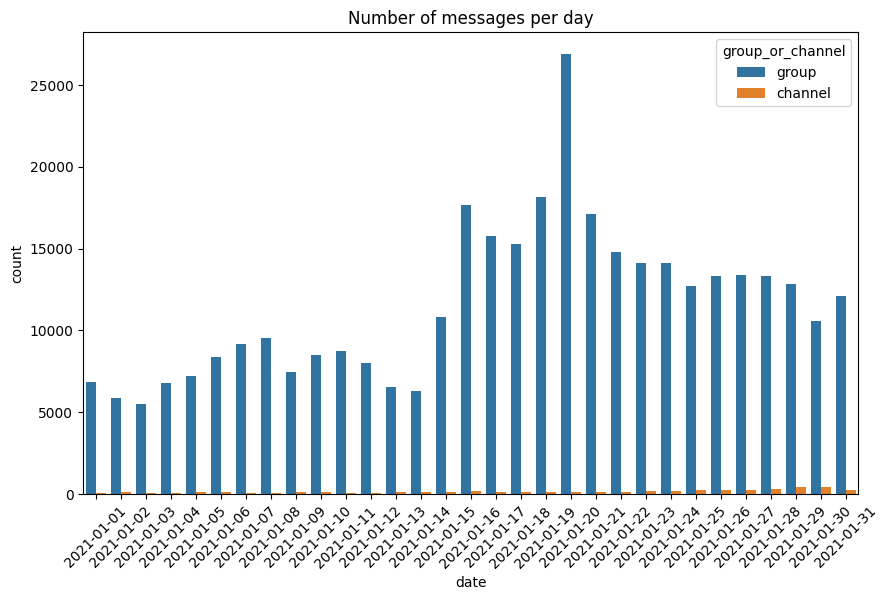

In [10]:
# plot number of messages per day
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=all_messages, x='date', hue='group_or_channel', ax=ax)
plt.xticks(rotation=45)
plt.title('Number of messages per day')
plt.show()

In [11]:
print(f'{len(all_messages[all_messages["group_or_channel"] == "group"])} group messages in January 2021')
print(f'{len(all_messages[all_messages["group_or_channel"] == "channel"])} channel messages in January 2021')
print(f'{len(all_messages)} total messages by {len(all_messages["author"].unique())} authors in January 2021')

357669 group messages in January 2021
4984 channel messages in January 2021
362653 total messages by 17208 authors in January 2021


In [12]:
all_messages.to_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')